In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from crypto_chatter.graph import *

import networkx as nx

data_source = 'twitter'
index_name = 'blockchain-interoperability-attacks'

In [2]:
graph = CryptoTwitterUserReplyGraph(index_name)

Output()

Loaded cache in 124 seconds
Index(['geo', 'in_reply_to_status_id', 'in_reply_to_user_id', 'created_at',
       'truncated', 'favorite_count', 'id', 'text', 'reply_count',
       'quote_count', 'user.friends_count', 'user.followers_count',
       'user.created_at', 'user.id', 'retweet_count',
       'extended_tweet.full_text', 'geo.coordinates', 'geo.type', 'full_text',
       'quoted_status.id'],
      dtype='object')


Output()

Constructed graph with 2,340,960 nodes and 9,836,578 edges in 13 seconds


Output()

Saved node and edge information to /Users/mridul/Desktop/TwitterAnalysis/data/mridul/twitter_data/twitter/blockchain-interoperability-attacks/user-reply-graph


Loaded cache in 129 seconds
saved graph data to cache
constructed complete user graph in 1791 seconds


In [3]:
G = graph.G

In [4]:
df = graph.data

In [5]:
len(df)

19618401

In [6]:
df.columns

Index(['geo', 'in_reply_to_status_id', 'in_reply_to_user_id', 'created_at',
       'truncated', 'favorite_count', 'id', 'text', 'reply_count',
       'quote_count', 'user.friends_count', 'user.followers_count',
       'user.created_at', 'user.id', 'retweet_count',
       'extended_tweet.full_text', 'geo.coordinates', 'geo.type', 'full_text',
       'quoted_status.id'],
      dtype='object')

In [7]:
len(G.nodes)

2340960

In [8]:
len(G.edges)

7298105

In [10]:
df.head()

,geo,in_reply_to_status_id,in_reply_to_user_id,created_at,truncated,favorite_count,id,text,reply_count,quote_count,user.friends_count,user.followers_count,user.created_at,user.id,retweet_count,extended_tweet.full_text,geo.coordinates,geo.type,full_text,quoted_status.id
0,NaN,1.591014e+18,5.954245e+08,Fri Nov 11 12:03:53 +0000 2022,False,0.0,1.591039e+18,"@0x5ab0 @Uniswap oh, missed fiat part, just sa...",0.0,0.0,5554.0,7050.0,Mon Jul 11 06:36:43 +0000 2011,3.332399e+08,0.0,NaN,NaN,NaN,"@0x5ab0 @Uniswap oh, missed fiat part, just sa...",NaN
1,NaN,NaN,NaN,Fri Nov 11 12:03:53 +0000 2022,True,0.0,1.591039e+18,Never seen such a deal for a punk since 2017! ...,0.0,0.0,2.0,0.0,Wed Nov 09 14:09:46 +0000 2022,1.590346e+18,0.0,Never seen such a deal for a punk since 2017! ...,NaN,NaN,Never seen such a deal for a punk since 2017! ...,1.591023e+18
2,NaN,NaN,NaN,Fri Nov 11 12:03:53 +0000 2022,True,0.0,1.591039e+18,Collection: ens \n Sold for: 1.0040189 Eth (12...,0.0,0.0,2.0,106.0,Sun May 01 15:06:34 +0000 2022,1.520782e+18,0.0,Collection: ens \n Sold for: 1.0040189 Eth (12...,NaN,NaN,Collection: ens \n Sold for: 1.0040189 Eth (12...,NaN
3,NaN,1.590777e+18,1.440028e+18,Fri Nov 11 12:03:54 +0000 2022,True,0.0,1.591039e+18,@Rocket_Moonshot @NzXrp @Bitboy_Crypto @digita...,0.0,0.0,0.0,0.0,Wed Dec 18 21:46:55 +0000 2013,2.252580e+09,0.0,@Rocket_Moonshot @NzXrp @Bitboy_Crypto @digita...,NaN,NaN,@Rocket_Moonshot @NzXrp @Bitboy_Crypto @digita...,NaN
4,NaN,1.590812e+18,1.386939e+18,Fri Nov 11 12:03:54 +0000 2022,True,0.0,1.591039e+18,@abu_crypto1 🩸 Scary bunny is a meme token wit...,0.0,0.0,50.0,3.0,Tue Oct 25 03:46:04 +0000 2022,1.584753e+18,0.0,@abu_crypto1 🩸 Scary bunny is a meme token wit...,NaN,NaN,@abu_crypto1 🩸 Scary bunny is a meme token wit...,NaN


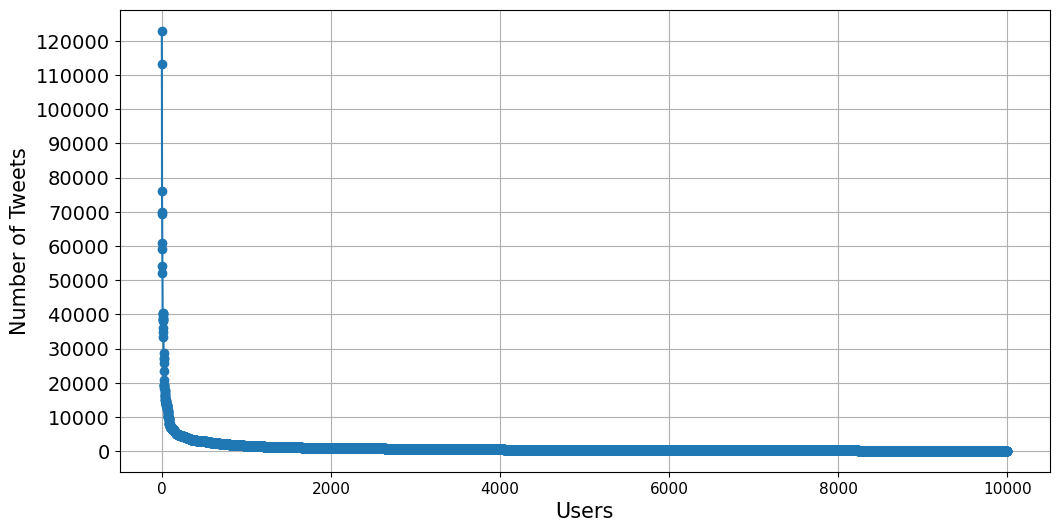

In [141]:
user_id_frequency = df['user.id'].value_counts()
user_id_frequency = user_id_frequency.sort_values(ascending=False)
top = 10000
top_freqs = user_id_frequency.head(top)
plt.figure(figsize=(12, 6))
plt.plot(top_freqs.values, linestyle='-', marker='o')
# plt.title('Top ' + str(top) + ' Users vs Row Frequency')
plt.xlabel('Users')
plt.ylabel('Number of Tweets')
plt.yticks(range(0, max(top_freqs), 10000))
plt.grid(True)
plt.show()

In [142]:
N = 10

tweet_samples = []

for uid in user_id_frequency.head(N).index:
    freq = user_id_frequency[uid]
    tweet = df[df['user.id'] == uid]['full_text'].values[0]
    tweet_samples.append({'User_ID': uid, 'Frequency': freq, 'Full_Text': tweet})
    
pd.set_option('display.max_colwidth', 120)
tweet_samples = pd.DataFrame(tweet_samples)

tweet_samples

,User_ID,Frequency,Full_Text
0,1.539342e+18,122949,Project Daylight is here to save DeFi ☀️\n\nLike and Retweet to Spread the Word 🔥🔥🔥\n\nJoin the Movement: \nDayligh...
1,2.105028e+08,113302,🚨 Sui Token Token Airdrop Is Now Live!\n\nA total of 25 million $SUI will be distributed.\nEligible people can claim...
2,4.889370e+07,76105,🚨 Optimism Token Airdrop Is Now Live!\n\nA total of 10 million $OP will be distributed.\nEligible people can claim b...
3,1.453561e+18,70043,"#SpookyShiba have so much back to the #community in the month of October. Between #BNB #BUSD, an #iPhone13 and over ..."
4,1.372886e+18,69478,🚨 Arbitrum Token Airdrop Is Now Live!\n\nA total of 25 million $ARB will be distributed.\nEligible people can claim ...
5,1.509558e+18,60800,🚨 Aptos Token Airdrop Is Now Live!\n\nA total of 30 million $APT will be distributed.\nEligible people can claim bas...
6,7.994506e+17,59254,🚨 zkSync Token Airdrop Is Now Live!\n\nA total of 10 million $ZKX will be distributed.\nEligible people can claim ba...
7,1.510871e+08,54123,🚨 LayerZero Token Airdrop 1st Round Is Now Live!\n\nA total of 10 million $ZRO will be distributed.\nEligible people...
8,3.219868e+09,52057,🪂 Aptos Token Airdrop is Now Live! \n \nA total of 20 million $APT will be distributed \n\nEligible people can claim...
9,1.598720e+09,40483,🪂 АРТ Token Аirdrор is Nоw Livе! \n \n-А total of 500 000 $APT will bе distributed. \n-Еligible pеople can claim bas...


In [11]:
degrees = dict(G.degree())
degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
degrees = [degree for _, degree in degrees]

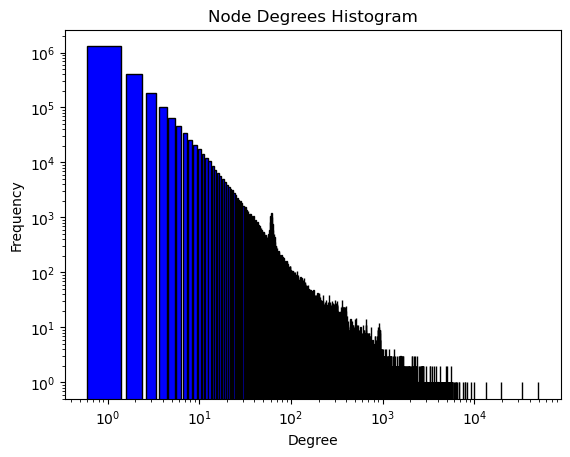

In [12]:
unique_degrees, degree_frequencies = np.unique(degrees, return_counts=True)
plt.bar(unique_degrees, degree_frequencies, color='blue', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title('Node Degrees Histogram')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

In [13]:
degrees = dict(G.degree())
degrees_values = list(degrees.values())

# In-Degree
in_degrees = dict(G.in_degree())
in_degrees_values = list(in_degrees.values())

# Out-Degree
out_degrees = dict(G.out_degree())
out_degrees_values = list(out_degrees.values())

# Overall Degree Statistics
mean_degree = np.mean(degrees_values)
median_degree = np.median(degrees_values)
max_degree = np.max(degrees_values)
std_degree = np.std(degrees_values)

print("Overall Degree Statistics:")
print(f"Mean: {mean_degree}")
print(f"Median: {median_degree}")
print(f"Max: {max_degree}")
print(f"Standard Deviation: {std_degree}")

# In-Degree Statistics
mean_in_degree = np.mean(in_degrees_values)
median_in_degree = np.median(in_degrees_values)
max_in_degree = np.max(in_degrees_values)
std_in_degree = np.std(in_degrees_values)

print("\nIn-Degree Statistics:")
print(f"Mean: {mean_in_degree}")
print(f"Median: {median_in_degree}")
print(f"Max: {max_in_degree}")
print(f"Standard Deviation: {std_in_degree}")

# Out-Degree Statistics
mean_out_degree = np.mean(out_degrees_values)
median_out_degree = np.median(out_degrees_values)
max_out_degree = np.max(out_degrees_values)
std_out_degree = np.std(out_degrees_values)

print("\nOut-Degree Statistics:")
print(f"Mean: {mean_out_degree}")
print(f"Median: {median_out_degree}")
print(f"Max: {max_out_degree}")
print(f"Standard Deviation: {std_out_degree}")

Overall Degree Statistics:
Mean: 6.235138575627093
Median: 1.0
Max: 49486
Standard Deviation: 75.74104963521498

In-Degree Statistics:
Mean: 3.1175692878135464
Median: 1.0
Max: 13051
Standard Deviation: 52.85877865188507

Out-Degree Statistics:
Mean: 3.1175692878135464
Median: 1.0
Max: 49481
Standard Deviation: 52.4526601571649


In [14]:
all_scc = list(nx.strongly_connected_components(G))
all_scc = sorted(all_scc, key=len, reverse=True)

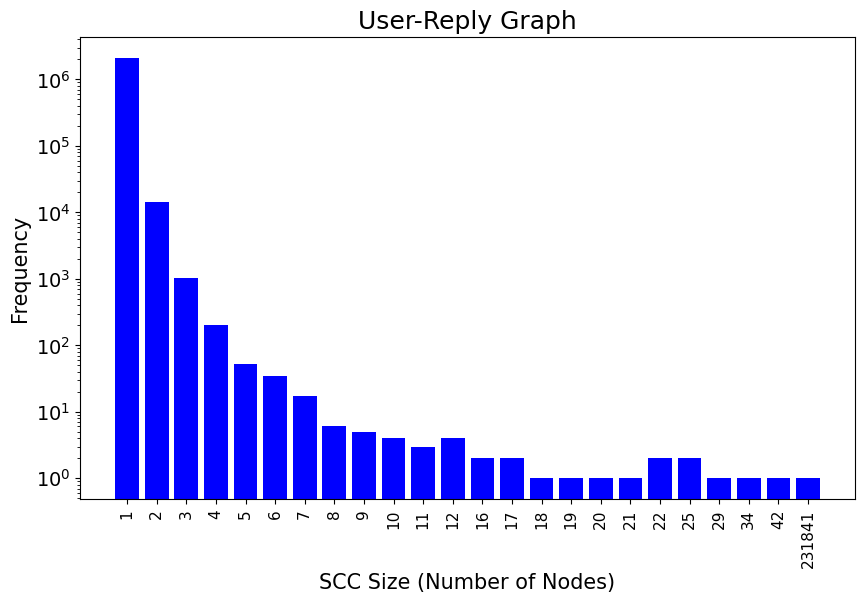

In [147]:
scc_sizes = [len(scc) for scc in all_scc]
scc_sizes, scc_frequencies = np.unique(scc_sizes, return_counts=True)

plt.figure(figsize=(10, 6))

# Plot the histogram with x-axis treated as categorical
plt.bar(range(len(scc_sizes)), scc_frequencies, color='blue')
plt.xticks(range(len(scc_sizes)), scc_sizes, rotation='vertical')
plt.yscale('log')
plt.title('User-Reply Graph')
plt.xlabel('SCC Size (Number of Nodes)')
plt.ylabel('Frequency')
plt.show()

In [125]:
scc_sizes[-1]

231841

In [16]:
def visualize_scc(G, scc, show_labels = False):
    
    subgraph = G.subgraph(scc)

    pos = nx.kamada_kawai_layout(subgraph)
        
    nx.draw(
            subgraph,
            pos,
            node_color='skyblue',
            node_size=100,
            font_size=6,
            font_color='black',
            font_weight='bold',
            edge_color='gray',
            linewidths=1,
            alpha=0.7
        )
     
    if show_labels:
            
        label_pos = {k: (x, y - 0.12) for k, (x, y) in pos.items()}
        nx.draw_networkx_labels(subgraph, label_pos, font_size=6, font_color='black', font_weight='bold')

    
    plt.title('Connected Component Visualization')
    plt.show()

In [17]:
visualize_scc(G, all_scc[0])

KeyboardInterrupt: 

In [19]:
len(all_scc[0])

231841

In [130]:
len(all_scc[1])

42

In [131]:
len(all_scc[2])

34

In [134]:
len(all_scc[3])

29

In [135]:
len(all_scc[4])

25

In [43]:
node_highest_in_degree, highest_in_degree = max(G.subgraph(all_scc[0]).in_degree(), key=lambda x: x[1])
node_highest_out_degree, highest_out_degree = max(G.subgraph(all_scc[0]).out_degree(), key=lambda x: x[1])
print('in : ', node_highest_in_degree, highest_in_degree)
print('out : ', node_highest_out_degree, highest_out_degree)

in :  1421434026926256128 2576
out :  877807935493033984 26004


In [47]:
df['id'] = df['id'].astype(int)

In [128]:
df[df['user.id'] == 1421434026926256128]

,geo,in_reply_to_status_id,in_reply_to_user_id,created_at,truncated,favorite_count,id,text,reply_count,quote_count,user.friends_count,user.followers_count,user.created_at,user.id,retweet_count,extended_tweet.full_text,geo.coordinates,geo.type,full_text,quoted_status.id
1133,NaN,1.590974e+18,3.995596e+07,Fri Nov 11 12:05:04 +0000 2022,True,0.0,1591039302200627200,@Auki81 @VeKingsNFT @madvapesnft @Flemish_Gian...,0.0,0.0,625.0,212.0,Sat Jul 31 11:36:52 +0000 2021,1.421434e+18,0.0,@Auki81 @VeKingsNFT @madvapesnft @Flemish_Gian...,NaN,NaN,@Auki81 @VeKingsNFT @madvapesnft @Flemish_Gian...,NaN
1394,NaN,1.590603e+18,1.446425e+18,Fri Nov 11 12:05:21 +0000 2022,True,0.0,1591039372262268928,@kaurcrypto 🍫 Kinder Inu (KinderINU) Token 🍫\n...,0.0,0.0,625.0,212.0,Sat Jul 31 11:36:52 +0000 2021,1.421434e+18,0.0,@kaurcrypto 🍫 Kinder Inu (KinderINU) Token 🍫\n...,NaN,NaN,@kaurcrypto 🍫 Kinder Inu (KinderINU) Token 🍫\n...,NaN
1558,NaN,1.590618e+18,1.438968e+18,Fri Nov 11 12:05:32 +0000 2022,True,0.0,1591039418357682176,@AJ_cryptoo 🍫 Kinder Inu (KinderINU) Token 🍫\n...,0.0,0.0,625.0,212.0,Sat Jul 31 11:36:52 +0000 2021,1.421434e+18,0.0,@AJ_cryptoo 🍫 Kinder Inu (KinderINU) Token 🍫\n...,NaN,NaN,@AJ_cryptoo 🍫 Kinder Inu (KinderINU) Token 🍫\n...,NaN
1746,NaN,1.590633e+18,1.313327e+18,Fri Nov 11 12:05:44 +0000 2022,True,0.0,1591039468693499904,@Encanis_On_Fire @AJ_cryptoo @spoodeemoon @cry...,0.0,0.0,625.0,212.0,Sat Jul 31 11:36:52 +0000 2021,1.421434e+18,0.0,@Encanis_On_Fire @AJ_cryptoo @spoodeemoon @cry...,NaN,NaN,@Encanis_On_Fire @AJ_cryptoo @spoodeemoon @cry...,NaN
2041,NaN,1.590649e+18,1.511619e+18,Fri Nov 11 12:06:00 +0000 2022,True,0.0,1591039539195555840,@CJ_Worf @AJ_cryptoo @CinnamoonEth 🍫 Kinder In...,0.0,0.0,625.0,212.0,Sat Jul 31 11:36:52 +0000 2021,1.421434e+18,0.0,@CJ_Worf @AJ_cryptoo @CinnamoonEth 🍫 Kinder In...,NaN,NaN,@CJ_Worf @AJ_cryptoo @CinnamoonEth 🍫 Kinder In...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73248,NaN,1.592969e+18,1.642596e+09,Sun Nov 20 12:50:48 +0000 2022,True,0.0,1594312301036933120,@LUNCHABER @LUNCDAO @binance @coinbase @cz_bin...,0.0,0.0,641.0,224.0,Sat Jul 31 11:36:52 +0000 2021,1.421434e+18,0.0,@LUNCHABER @LUNCDAO @binance @coinbase @cz_bin...,NaN,NaN,@LUNCHABER @LUNCDAO @binance @coinbase @cz_bin...,NaN
83907,NaN,1.593632e+18,1.528814e+18,Sun Nov 20 15:30:15 +0000 2022,True,0.0,1594352429109489664,@_CryptoCashFlow @GnosisDAO @AugurProjects @Un...,0.0,0.0,641.0,224.0,Sat Jul 31 11:36:52 +0000 2021,1.421434e+18,0.0,@_CryptoCashFlow @GnosisDAO @AugurProjects @Un...,NaN,NaN,@_CryptoCashFlow @GnosisDAO @AugurProjects @Un...,NaN
44310,NaN,1.592627e+18,4.818910e+08,Sun Nov 20 09:23:10 +0000 2022,True,0.0,1594260051329441792,@real_Mr_google @Neo_Blockchain @ensdomains @F...,0.0,0.0,641.0,224.0,Sat Jul 31 11:36:52 +0000 2021,1.421434e+18,0.0,@real_Mr_google @Neo_Blockchain @ensdomains @F...,NaN,NaN,@real_Mr_google @Neo_Blockchain @ensdomains @F...,NaN
48388,NaN,1.592544e+18,1.021444e+18,Sun Nov 20 09:29:49 +0000 2022,True,0.0,1594261722378162176,@uwannaeffiong9 @cosmos 😉 Already launched\n✅S...,0.0,0.0,641.0,224.0,Sat Jul 31 11:36:52 +0000 2021,1.421434e+18,0.0,@uwannaeffiong9 @cosmos 😉 Already launched\n✅S...,NaN,NaN,@uwannaeffiong9 @cosmos 😉 Already launched\n✅S...,NaN


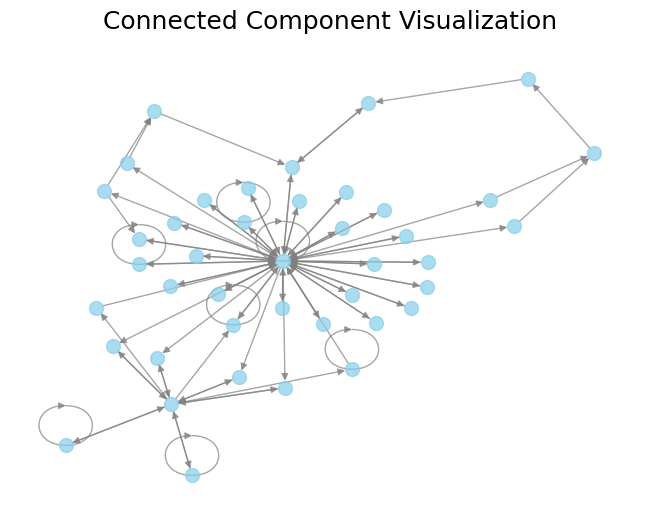

In [143]:
visualize_scc(G, all_scc[1])

In [50]:
all_scc[1]

{34552055,
 45402403,
 60679359,
 100350892,
 151553293,
 161917345,
 165068845,
 167520446,
 222635785,
 245792783,
 290792272,
 336966908,
 351065483,
 385311427,
 389205780,
 395115113,
 412969990,
 490801815,
 545285743,
 589057173,
 598496171,
 710739899,
 733347132,
 1380468146,
 1554068508,
 1973914212,
 2201272066,
 2719448991,
 3352026118,
 4105547489,
 4853060110,
 710840296439980032,
 711128854325305344,
 890975957326188544,
 920321913972502528,
 1100114905544474624,
 1201754453352865792,
 1323288481595035648,
 1514955780599992320,
 1532421071470747648,
 1534615599627780096,
 1587685245549248512}

In [51]:
node_highest_in_degree, highest_in_degree = max(G.subgraph(all_scc[1]).in_degree(), key=lambda x: x[1])
node_highest_out_degree, highest_out_degree = max(G.subgraph(all_scc[1]).out_degree(), key=lambda x: x[1])
print('in : ', node_highest_in_degree, highest_in_degree)
print('out : ', node_highest_out_degree, highest_out_degree)

in :  4105547489 27
out :  4105547489 33


In [52]:
df[df['user.id'] == 4105547489]

,geo,in_reply_to_status_id,in_reply_to_user_id,created_at,truncated,favorite_count,id,text,reply_count,quote_count,user.friends_count,user.followers_count,user.created_at,user.id,retweet_count,extended_tweet.full_text,geo.coordinates,geo.type,full_text,quoted_status.id
27884,NaN,1.591042e+18,1.587685e+18,Fri Nov 11 12:34:29 +0000 2022,True,0.0,1591046704396406784,"@jerryhappy407 Hello Esteemed Customer,\n\nWe ...",0.0,0.0,83.0,72443.0,Tue Nov 03 15:54:26 +0000 2015,4.105547e+09,0.0,"@jerryhappy407 Hello Esteemed Customer,\n\nWe ...",NaN,NaN,"@jerryhappy407 Hello Esteemed Customer,\n\nWe ...",NaN
37740,NaN,1.591031e+18,8.909760e+17,Fri Nov 11 11:40:19 +0000 2022,True,0.0,1591033074740969472,"@LayoPhobia @ieServe Hello Esteemed Customer,\...",0.0,0.0,83.0,72442.0,Tue Nov 03 15:54:26 +0000 2015,4.105547e+09,0.0,"@LayoPhobia @ieServe Hello Esteemed Customer,\...",NaN,NaN,"@LayoPhobia @ieServe Hello Esteemed Customer,\...",NaN
90511,NaN,1.591029e+18,1.100115e+18,Fri Nov 11 12:35:51 +0000 2022,True,0.0,1591047049923162112,"@TrendsVeronica Hello Esteemed Customer,\n\nWe...",0.0,0.0,83.0,72443.0,Tue Nov 03 15:54:26 +0000 2015,4.105547e+09,0.0,"@TrendsVeronica Hello Esteemed Customer,\n\nWe...",NaN,NaN,"@TrendsVeronica Hello Esteemed Customer,\n\nWe...",NaN
79900,NaN,1.590994e+18,3.369669e+08,Fri Nov 11 09:08:11 +0000 2022,True,0.0,1590994786487762944,"@demoadefa Hello Damola, \n \nOur sincere apol...",0.0,0.0,83.0,72434.0,Tue Nov 03 15:54:26 +0000 2015,4.105547e+09,0.0,"@demoadefa Hello Damola, \n \nOur sincere apol...",NaN,NaN,"@demoadefa Hello Damola, \n \nOur sincere apol...",NaN
97046,NaN,1.590996e+18,3.369669e+08,Fri Nov 11 09:34:51 +0000 2022,True,0.0,1591001500549271552,"@demoadefa Hello Demola,\n\nOur sincere apolog...",0.0,0.0,83.0,72435.0,Tue Nov 03 15:54:26 +0000 2015,4.105547e+09,0.0,"@demoadefa Hello Demola,\n\nOur sincere apolog...",NaN,NaN,"@demoadefa Hello Demola,\n\nOur sincere apolog...",NaN
87757,NaN,1.590852e+18,3.455206e+07,Fri Nov 11 07:47:03 +0000 2022,True,0.0,1590974368716587008,@IsaacAnyaogu1 @ieServe Hello Esteemed Custome...,0.0,0.0,83.0,72428.0,Tue Nov 03 15:54:26 +0000 2015,4.105547e+09,0.0,@IsaacAnyaogu1 @ieServe Hello Esteemed Custome...,NaN,NaN,@IsaacAnyaogu1 @ieServe Hello Esteemed Custome...,NaN
92626,NaN,1.590820e+18,1.380468e+09,Fri Nov 11 07:55:42 +0000 2022,True,0.0,1590976545664933888,"@oyinlomorotinwa Hello Esteemed Customer,\n \n...",0.0,0.0,83.0,72430.0,Tue Nov 03 15:54:26 +0000 2015,4.105547e+09,0.0,"@oyinlomorotinwa Hello Esteemed Customer,\n \n...",NaN,NaN,"@oyinlomorotinwa Hello Esteemed Customer,\n \n...",NaN
44539,NaN,1.591081e+18,4.129700e+08,Fri Nov 11 15:10:29 +0000 2022,True,0.0,1591085963694198784,"@Princeinua Hello Esteemed Customer,\n\nWe sin...",0.0,0.0,83.0,72442.0,Tue Nov 03 15:54:26 +0000 2015,4.105547e+09,0.0,"@Princeinua Hello Esteemed Customer,\n\nWe sin...",NaN,NaN,"@Princeinua Hello Esteemed Customer,\n\nWe sin...",NaN
86160,NaN,1.590331e+18,9.203219e+17,Thu Nov 10 08:18:23 +0000 2022,True,0.0,1590619866213777408,"@oseniahmed95 Hello Esteemed Customer,\n\nThan...",0.0,0.0,83.0,72383.0,Tue Nov 03 15:54:26 +0000 2015,4.105547e+09,0.0,"@oseniahmed95 Hello Esteemed Customer,\n\nThan...",NaN,NaN,"@oseniahmed95 Hello Esteemed Customer,\n\nThan...",NaN
82545,NaN,1.592179e+18,3.510655e+08,Mon Nov 14 16:18:15 +0000 2022,True,0.0,1592190183436611584,"@akowonjoking Hello Esteemed Customer,\n\nOur ...",0.0,0.0,83.0,72546.0,Tue Nov 03 15:54:26 +0000 2015,4.105547e+09,0.0,"@akowonjoking Hello Esteemed Customer,\n\nOur ...",NaN,NaN,"@akowonjoking Hello Esteemed Customer,\n\nOur ...",NaN


In [119]:
node_highest_in_degree, highest_in_degree = max(G.subgraph(all_scc[4]).in_degree(), key=lambda x: x[1])
node_highest_out_degree, highest_out_degree = max(G.subgraph(all_scc[4]).out_degree(), key=lambda x: x[1])
print('in : ', node_highest_in_degree, highest_in_degree)
print('out : ', node_highest_out_degree, highest_out_degree)

in :  2252807799 7
out :  2252571805 6


In [122]:
all_scc[4]

{2252428886,
 2252493544,
 2252494890,
 2252571805,
 2252583546,
 2252604004,
 2252607200,
 2252616829,
 2252651551,
 2252675646,
 2252693573,
 2252700731,
 2252714918,
 2252726622,
 2252737831,
 2252743135,
 2252752651,
 2252761448,
 2252769329,
 2252790523,
 2252804840,
 2252807799,
 2252810448,
 2252813176,
 2252824062}

In [123]:
df[df['user.id'] == 2252752651]

,geo,in_reply_to_status_id,in_reply_to_user_id,created_at,truncated,favorite_count,id,text,reply_count,quote_count,user.friends_count,user.followers_count,user.created_at,user.id,retweet_count,extended_tweet.full_text,geo.coordinates,geo.type,full_text,quoted_status.id
69945,NaN,1.590990e+18,1.590647e+18,Fri Nov 11 08:52:45 +0000 2022,True,0.0,1590990903757443072,@macredpilled @SBF_FTX @cz_binance I Wish I di...,0.0,0.0,3.0,0.0,Thu Dec 19 00:46:37 +0000 2013,2.252753e+09,0.0,@macredpilled @SBF_FTX @cz_binance I Wish I di...,NaN,NaN,@macredpilled @SBF_FTX @cz_binance I Wish I di...,NaN
71394,NaN,1.590694e+18,9.029269e+17,Fri Nov 11 08:55:05 +0000 2022,True,0.0,1590991492864434176,@cz_binance @ZenraTrader I Wish I discovered t...,0.0,0.0,3.0,0.0,Thu Dec 19 00:46:37 +0000 2013,2.252753e+09,0.0,@cz_binance @ZenraTrader I Wish I discovered t...,NaN,NaN,@cz_binance @ZenraTrader I Wish I discovered t...,NaN
71502,NaN,1.590758e+18,9.629107e+17,Fri Nov 11 08:55:17 +0000 2022,True,0.0,1590991541161857024,@FTX_Wallet @redwan11123 I Wish I discovered t...,0.0,0.0,3.0,0.0,Thu Dec 19 00:46:37 +0000 2013,2.252753e+09,0.0,@FTX_Wallet @redwan11123 I Wish I discovered t...,NaN,NaN,@FTX_Wallet @redwan11123 I Wish I discovered t...,NaN
72450,NaN,1.590991e+18,1.582469e+18,Fri Nov 11 08:56:42 +0000 2022,True,0.0,1590991899137306624,@cupcake_geniie @Near_mem @AlBukannal I Wish I...,0.0,0.0,3.0,0.0,Thu Dec 19 00:46:37 +0000 2013,2.252753e+09,0.0,@cupcake_geniie @Near_mem @AlBukannal I Wish I...,NaN,NaN,@cupcake_geniie @Near_mem @AlBukannal I Wish I...,NaN
72723,NaN,1.590099e+18,1.495901e+18,Fri Nov 11 08:57:07 +0000 2022,True,0.0,1590992002896003072,@delphibets @Aizen00123 @FTX_Official @binance...,0.0,0.0,3.0,0.0,Thu Dec 19 00:46:37 +0000 2013,2.252753e+09,0.0,@delphibets @Aizen00123 @FTX_Official @binance...,NaN,NaN,@delphibets @Aizen00123 @FTX_Official @binance...,NaN
75867,NaN,1.590798e+18,1.173425e+18,Fri Nov 11 09:01:37 +0000 2022,True,0.0,1590993136897359872,@AirdropStario @Sumon121224 I Wish I discovere...,0.0,0.0,3.0,0.0,Thu Dec 19 00:46:37 +0000 2013,2.252753e+09,0.0,@AirdropStario @Sumon121224 I Wish I discovere...,NaN,NaN,@AirdropStario @Sumon121224 I Wish I discovere...,NaN
85741,NaN,1.590991e+18,5.057376e+08,Fri Nov 11 09:17:04 +0000 2022,True,0.0,1590997023565938688,@qsirul @coinscreener_ai @ReachDAO I Wish I di...,0.0,0.0,3.0,0.0,Thu Dec 19 00:46:37 +0000 2013,2.252753e+09,0.0,@qsirul @coinscreener_ai @ReachDAO I Wish I di...,NaN,NaN,@qsirul @coinscreener_ai @ReachDAO I Wish I di...,NaN
86760,NaN,1.590798e+18,1.173425e+18,Fri Nov 11 09:18:43 +0000 2022,True,0.0,1590997438919319552,@AirdropStario @jayed_1 I Wish I discovered th...,0.0,0.0,3.0,0.0,Thu Dec 19 00:46:37 +0000 2013,2.252753e+09,0.0,@AirdropStario @jayed_1 I Wish I discovered th...,NaN,NaN,@AirdropStario @jayed_1 I Wish I discovered th...,NaN
90841,NaN,1.590678e+18,1.387498e+18,Fri Nov 11 09:25:09 +0000 2022,True,0.0,1590999057878913024,@WatcherGuru @MatiAyele I Wish I discovered th...,0.0,0.0,3.0,0.0,Thu Dec 19 00:46:37 +0000 2013,2.252753e+09,0.0,@WatcherGuru @MatiAyele I Wish I discovered th...,NaN,NaN,@WatcherGuru @MatiAyele I Wish I discovered th...,NaN
94622,NaN,1.590991e+18,2.252572e+09,Fri Nov 11 09:30:56 +0000 2022,True,0.0,1591000515475025920,@AdledeN @hendrisyahadeP @the_cryptonions @Pus...,0.0,0.0,3.0,0.0,Thu Dec 19 00:46:37 +0000 2013,2.252753e+09,0.0,@AdledeN @hendrisyahadeP @the_cryptonions @Pus...,NaN,NaN,@AdledeN @hendrisyahadeP @the_cryptonions @Pus...,NaN


In [ ]:
visualize_scc(G, all_scc[2])

In [53]:
all_scc[2]

{1591434143744905216,
 1591434487157723136,
 1591434572062941184,
 1591434949974007808,
 1591435051148926976,
 1591435331034808320,
 1591435373799956480,
 1591435538078261248,
 1591435656458342400,
 1591435666629529600,
 1591435873580638208,
 1591436975709593600,
 1591436976519090176,
 1591437390610157568,
 1591438998395912192,
 1591439024937369600,
 1591439251106848768,
 1591439530275528704,
 1591439722173399040,
 1591439904021663744,
 1591440585226862592,
 1591440610728321024,
 1591440726449180672,
 1591440816265912320,
 1591440830912495616,
 1591441140296843264,
 1591441658478039040,
 1591442191905341440,
 1591442467664154624,
 1591442535481851904,
 1591442620550619136,
 1591442833222893568,
 1591443044007542784,
 1591443481775538176}

In [54]:
node_highest_in_degree, highest_in_degree = max(G.subgraph(all_scc[2]).in_degree(), key=lambda x: x[1])
node_highest_out_degree, highest_out_degree = max(G.subgraph(all_scc[2]).out_degree(), key=lambda x: x[1])
print('in : ', node_highest_in_degree, highest_in_degree)
print('out : ', node_highest_out_degree, highest_out_degree)

in :  1591439530275528704 4
out :  1591434949974007808 7


In [129]:
df[df['user.id'] == 1591434949974007808]

,geo,in_reply_to_status_id,in_reply_to_user_id,created_at,truncated,favorite_count,id,text,reply_count,quote_count,user.friends_count,user.followers_count,user.created_at,user.id,retweet_count,extended_tweet.full_text,geo.coordinates,geo.type,full_text,quoted_status.id
29091,NaN,1.594247e+18,1.591442e+18,Sun Nov 20 08:58:40 +0000 2022,False,0.0,1594253885857845248,@HMosciski67 @EnjoyGiftCard1 @binance @Cristia...,0.0,0.0,0.0,0.0,Sat Nov 12 14:17:18 +0000 2022,1.591435e+18,0.0,NaN,NaN,NaN,@HMosciski67 @EnjoyGiftCard1 @binance @Cristia...,NaN
91918,NaN,1.594237e+18,3.392952e+07,Sun Nov 20 08:29:49 +0000 2022,False,0.0,1594246622824652800,@King333Choo @Turf_NFT The crypto elites and b...,0.0,0.0,0.0,0.0,Sat Nov 12 14:17:18 +0000 2022,1.591435e+18,0.0,NaN,NaN,NaN,@King333Choo @Turf_NFT The crypto elites and b...,NaN
93500,NaN,1.593949e+18,8.778079e+17,Sun Nov 20 08:32:12 +0000 2022,True,0.0,1594247223780458496,@binance @malhzr18 @Cristiano I Wish I discove...,0.0,0.0,0.0,0.0,Sat Nov 12 14:17:18 +0000 2022,1.591435e+18,0.0,@binance @malhzr18 @Cristiano I Wish I discove...,NaN,NaN,@binance @malhzr18 @Cristiano I Wish I discove...,NaN
95154,NaN,1.594104e+18,9.738671e+07,Sun Nov 20 08:34:59 +0000 2022,True,0.0,1594247926016086016,@p3shky @subhra91925265 @menjisworld @Bridge3L...,0.0,0.0,0.0,0.0,Sat Nov 12 14:17:18 +0000 2022,1.591435e+18,0.0,@p3shky @subhra91925265 @menjisworld @Bridge3L...,NaN,NaN,@p3shky @subhra91925265 @menjisworld @Bridge3L...,NaN
95596,NaN,1.593949e+18,8.778079e+17,Sun Nov 20 08:35:42 +0000 2022,True,0.0,1594248104542453760,@binance @Ojjjiiiii @Cristiano I can't recall ...,0.0,0.0,0.0,0.0,Sat Nov 12 14:17:18 +0000 2022,1.591435e+18,0.0,@binance @Ojjjiiiii @Cristiano I can't recall ...,NaN,NaN,@binance @Ojjjiiiii @Cristiano I can't recall ...,NaN
99287,NaN,1.594250e+18,1.591443e+18,Sun Nov 20 08:41:38 +0000 2022,False,0.0,1594249597488070656,@JaeConnell @manny12588 @binance @das18_kumar ...,0.0,0.0,0.0,0.0,Sat Nov 12 14:17:18 +0000 2022,1.591435e+18,0.0,NaN,NaN,NaN,@JaeConnell @manny12588 @binance @das18_kumar ...,NaN
1858,NaN,1.593532e+18,8.778079e+17,Sun Nov 20 08:45:21 +0000 2022,False,0.0,1594250534457729024,@binance @NFTscollectable @Cristiano Make back...,0.0,0.0,0.0,0.0,Sat Nov 12 14:17:18 +0000 2022,1.591435e+18,0.0,NaN,NaN,NaN,@binance @NFTscollectable @Cristiano Make back...,NaN
3398,NaN,1.594247e+18,3.822734e+07,Sun Nov 20 08:47:54 +0000 2022,False,0.0,1594251174059814912,@newyorknigga @binance @NathanBF5 @Cristiano T...,0.0,0.0,0.0,0.0,Sat Nov 12 14:17:18 +0000 2022,1.591435e+18,0.0,NaN,NaN,NaN,@newyorknigga @binance @NathanBF5 @Cristiano T...,NaN


In [ ]:
visualize_scc(G, all_scc[3])

In [ ]:
all_scc[3]

In [ ]:
df[df['user.id'] == 5533262]

In [ ]:
all_scc[4]

In [ ]:
df[df['user.id'] == 1589535471792574464]

In [20]:
curr_scc = all_scc[0]
start_node = list(curr_scc)[0]

reachable_nodes = nx.single_source_shortest_path_length(G, start_node)
non_scc_reachable_nodes = {node: distance for node, distance in reachable_nodes.items() if node not in curr_scc}
sorted_reachable_nodes = sorted(non_scc_reachable_nodes.items(), key=lambda x: x[1], reverse=True)

print(len(sorted_reachable_nodes)),
print(sorted_reachable_nodes[0:10])

222385
[(1076433222119043072, 24), (286216823, 24), (350977914, 23), (42791605, 23), (1142004073, 23), (792714942160003072, 23), (1069526806150213632, 23), (589827522, 23), (836091095658315776, 23), (39004353, 23)]


In [21]:
curr_scc = all_scc[1]
start_node = list(curr_scc)[0]

reachable_nodes = nx.single_source_shortest_path_length(G, start_node)
non_scc_reachable_nodes = {node: distance for node, distance in reachable_nodes.items() if node not in curr_scc}
sorted_reachable_nodes = sorted(non_scc_reachable_nodes.items(), key=lambda x: x[1], reverse=True)

print(len(sorted_reachable_nodes)),
print(sorted_reachable_nodes[0:10])

454579
[(1076433222119043072, 26), (286216823, 26), (350977914, 25), (42791605, 25), (1142004073, 25), (792714942160003072, 25), (1069526806150213632, 25), (589827522, 25), (836091095658315776, 25), (39004353, 25)]


In [ ]:
df[df['user.id'] == 1571002006080462848]

In [22]:
curr_scc = all_scc[2]
start_node = list(curr_scc)[0]

reachable_nodes = nx.single_source_shortest_path_length(G, start_node)
non_scc_reachable_nodes = {node: distance for node, distance in reachable_nodes.items() if node not in curr_scc}
sorted_reachable_nodes = sorted(non_scc_reachable_nodes.items(), key=lambda x: x[1], reverse=True)

print(len(sorted_reachable_nodes)),
print(sorted_reachable_nodes[0:10])

14
[(1591438883958538240, 9), (1591436944990429184, 8), (1591435933303324672, 7), (1591437487557300224, 6), (1591442255818248192, 5), (1591440470223331328, 5), (1591434944542302208, 5), (1591435506356785152, 4), (1591434577872027648, 3), (1591442041099231232, 3)]


In [23]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from wordcloud import WordCloud
from sklearn.cluster import KMeans


def clean_text(text):
    stop_words = set(stopwords.words('english'))
    custom_stopwords = set(['amp', 'rt', 'via', '...', '...', '’', '—', '“', '”', '‘', '’', '...', '``', "''", '️', '...'])
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[@#]', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words and word not in custom_stopwords]
    cleaned_text = ' '.join(filtered_words)
    return cleaned_text

def get_tfidf(df, scc):
    nltk.download('stopwords')
    
    user_ids_in_scc = [node for node in scc]
    full_texts_in_scc = list(df[df['user.id'].isin(user_ids_in_scc)]['full_text'])
    cleaned_texts = [clean_text(text) for text in full_texts_in_scc]
    
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(cleaned_texts)
    feature_names = vectorizer.get_feature_names_out()

    return tfidf_matrix, feature_names


def get_top_k_words_from_scc(df, scc, k=50, barplot=False, wordcloud=True):

    tfidf_matrix, feature_names = get_tfidf(df, scc)
    term_sum = tfidf_matrix.sum(axis=0)
    term_df = pd.DataFrame({'term': feature_names, 'tfidf_sum': term_sum.tolist()[0]})
    term_df_sorted = term_df.sort_values(by='tfidf_sum', ascending=False)
    top_keywords = term_df_sorted.head(k)['term'].tolist()

    if(barplot):
        plt.figure(figsize=(12, 6))
        plt.bar(top_keywords, term_df_sorted.head(k)['tfidf_sum'], color='skyblue')
        plt.xticks(rotation=90, ha='right')
        plt.xlabel('Keywords')
        plt.ylabel('TF-IDF Sum')
        plt.title('Top' + str(k) + ' Keywords by TF-IDF Sum')
        plt.tight_layout()
        plt.show()
    
    if(wordcloud):
        
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_df_sorted.set_index('term')['tfidf_sum'][0:k].to_dict())
    
        plt.figure(figsize=(10, 5))
        plt.title('Top' + str(k) + ' Keywords by TF-IDF Sum')
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
    
    return top_keywords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mridul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


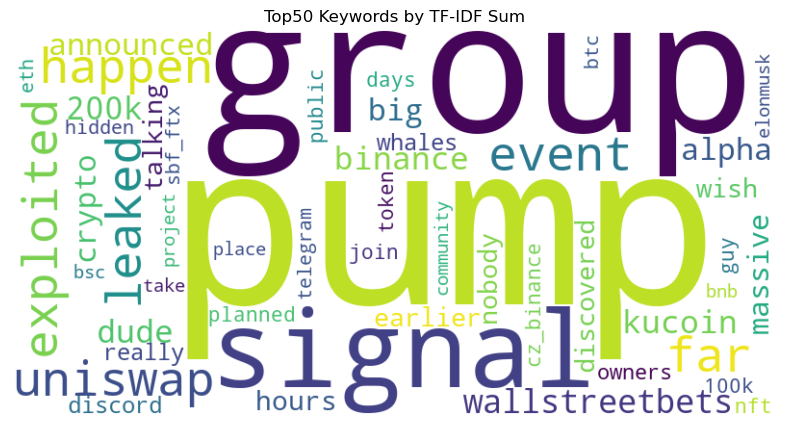

In [24]:
# top_keywpords = get_top_k_words_from_scc(df, all_scc[0], k=50, barplot=False, wordcloud=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mridul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


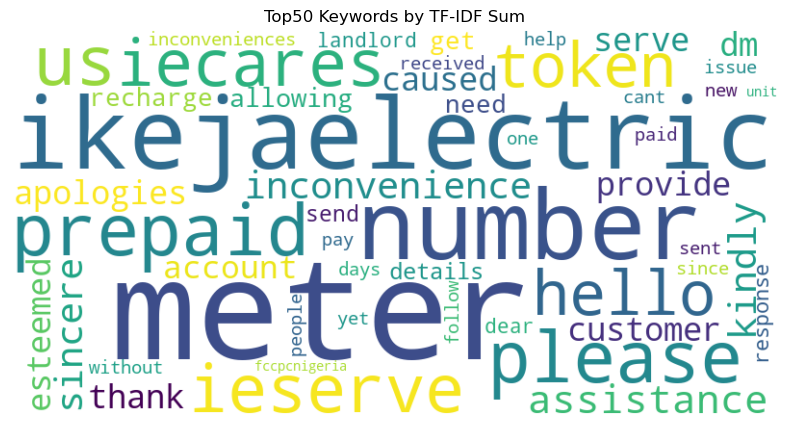

In [25]:
# top_keywpords = get_top_k_words_from_scc(df, all_scc[1], k=50, barplot=False, wordcloud=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mridul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


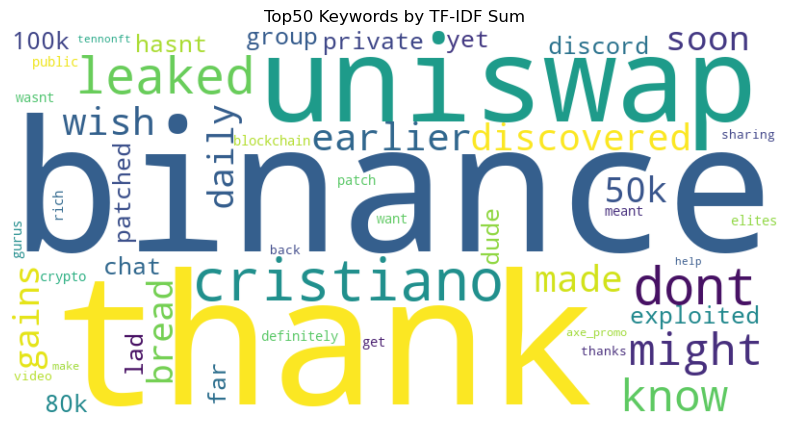

In [26]:
top_keywpords = get_top_k_words_from_scc(df, all_scc[2], k=50, barplot=False, wordcloud=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mridul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


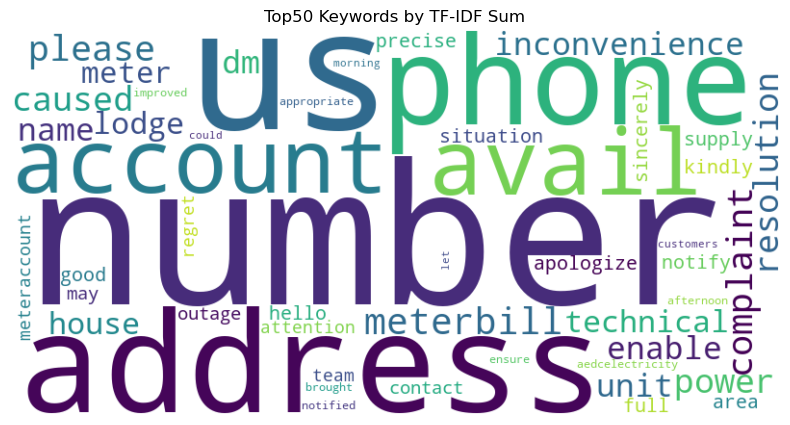

In [27]:
# top_keywpords = get_top_k_words_from_scc(df, all_scc[3], k=50, barplot=False, wordcloud=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mridul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


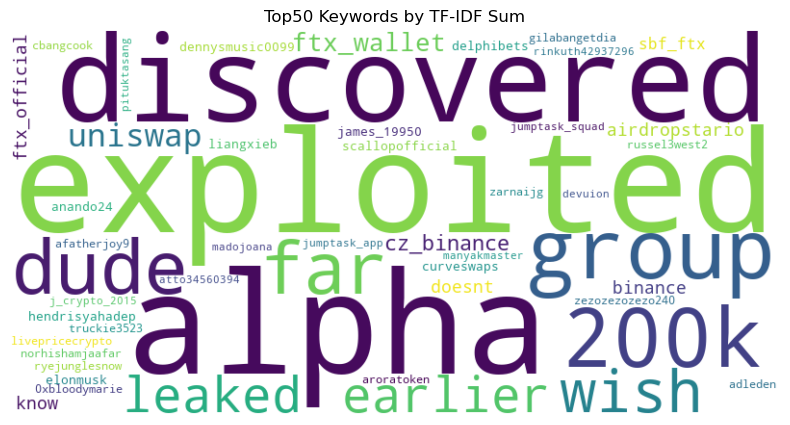

In [28]:
# top_keywpords = get_top_k_words_from_scc(df, all_scc[4], k=50, barplot=False, wordcloud=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mridul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


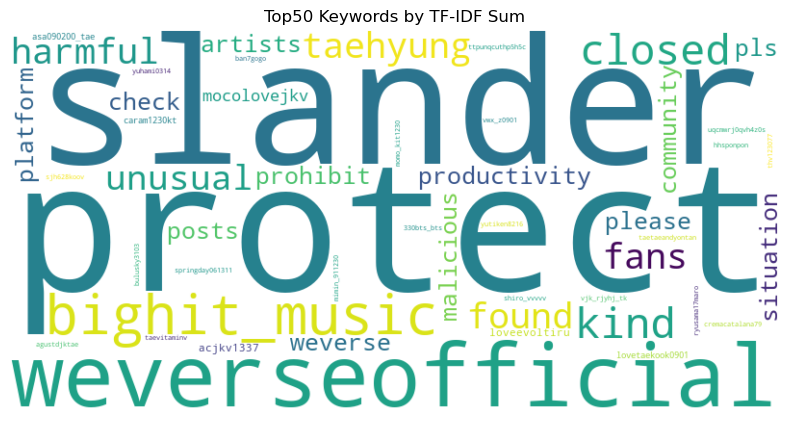

In [29]:
# top_keywpords = get_top_k_words_from_scc(df, all_scc[5], k=50, barplot=False, wordcloud=True)

In [30]:

# original_engagement = df[['favorite_count', 'retweet_count']].loc[df['quoted_status.id'].isnull()]
# quoted_engagement = df[['quoted_status.favorite_count', 'quoted_status.retweet_count']].dropna()

# avg_original_favorite = original_engagement['favorite_count'].mean()
# avg_original_retweet = original_engagement['retweet_count'].mean()
# avg_quoted_favorite = quoted_engagement['quoted_status.favorite_count'].mean()
# avg_quoted_retweet = quoted_engagement['quoted_status.retweet_count'].mean()

# print(f"Average favorites for original tweets: {avg_quoted_favorite:.2f}")
# print(f"Average favorites for quotes: {avg_original_favorite:.2f}")
# print("")
# print(f"Average retweets for original tweets: {avg_quoted_retweet:.2f}")
# print(f"Average retweets for quotes: {avg_original_retweet:.2f}")


KeyError: "None of [Index(['quoted_status.favorite_count', 'quoted_status.retweet_count'], dtype='object')] are in the [columns]"

In [31]:
df_network = df[['created_at', 'user.id', 'in_reply_to_user_id']].copy()
df_network['created_at'] = pd.to_datetime(df_network['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
df_network.sort_values(by='created_at', inplace=True)

In [71]:
scc = all_scc[1]
scc_users = df[df['user.id'].isin(scc) | df['in_reply_to_user_id'].isin(scc)]
scc_friends_followers = scc_users[['user.friends_count', 'user.followers_count']]

start_node = list(scc)[0]

reachable_nodes = nx.single_source_shortest_path_length(G, start_node)
non_scc_reachable_nodes = {node: distance for node, distance in reachable_nodes.items() if node not in scc}

reachable_users = df[df['user.id'].isin(non_scc_reachable_nodes) | df['in_reply_to_user_id'].isin(non_scc_reachable_nodes)]
reachable_friends_followers = reachable_users[['user.id', 'user.friends_count', 'user.followers_count']]
reachable_friends_followers_sorted = reachable_friends_followers.sort_values(by=['user.followers_count'], ascending=False)

In [72]:
reachable_friends_followers_sorted[0:10]

,user.id,user.friends_count,user.followers_count
20877,44196397.0,129.0,118551824.0
9973,44196397.0,129.0,118550059.0
14469,44196397.0,129.0,118539304.0
98686,44196397.0,129.0,118534921.0
56076,44196397.0,129.0,118529781.0
58566,44196397.0,129.0,118522898.0
49062,44196397.0,129.0,118520057.0
11173,44196397.0,129.0,118496807.0
4654,44196397.0,129.0,118493273.0
26937,44196397.0,129.0,118490134.0


In [74]:
path_to_target = nx.shortest_path(G, source=start_node, target=44196397)

In [75]:
path_to_target

[1534615599627780096,
 4105547489,
 58788602,
 1518863995662389248,
 1446401969548058624,
 1303797127651393536,
 1282260925865701376,
 22993266,
 2327407569,
 1035721495,
 44196397]

In [86]:
df[df['user.id'] == 44196397]

,geo,in_reply_to_status_id,in_reply_to_user_id,created_at,truncated,favorite_count,id,text,reply_count,quote_count,user.friends_count,user.followers_count,user.created_at,user.id,retweet_count,extended_tweet.full_text,geo.coordinates,geo.type,full_text,quoted_status.id
61902,NaN,1.589409e+18,3.069905e+07,Mon Nov 07 00:14:41 +0000 2022,True,12725.0,1589410976419680256,@BillyM2k @StonksReddit No problem to use a ps...,817.0,152.0,130.0,115495054.0,Tue Jun 02 20:12:29 +0000 2009,44196397.0,1075.0,@BillyM2k @StonksReddit No problem to use a ps...,NaN,NaN,@BillyM2k @StonksReddit No problem to use a ps...,NaN
35484,NaN,1.589794e+18,1.291945e+09,Tue Nov 08 14:49:05 +0000 2022,True,28895.0,1589993413973544960,@PPathole @mayemusk While it’s true that I’ve ...,3.0,519.0,129.0,115191794.0,Tue Jun 02 20:12:29 +0000 2009,44196397.0,1723.0,@PPathole @mayemusk While it’s true that I’ve ...,NaN,NaN,@PPathole @mayemusk While it’s true that I’ve ...,NaN
63346,NaN,1.589794e+18,1.291945e+09,Tue Nov 08 14:49:05 +0000 2022,True,28905.0,1589993413973544960,@PPathole @mayemusk While it’s true that I’ve ...,3.0,517.0,129.0,115193832.0,Tue Jun 02 20:12:29 +0000 2009,44196397.0,1724.0,@PPathole @mayemusk While it’s true that I’ve ...,NaN,NaN,@PPathole @mayemusk While it’s true that I’ve ...,NaN
63875,NaN,1.589794e+18,1.291945e+09,Tue Nov 08 14:49:05 +0000 2022,True,28906.0,1589993413973544960,@PPathole @mayemusk While it’s true that I’ve ...,3.0,518.0,129.0,115193922.0,Tue Jun 02 20:12:29 +0000 2009,44196397.0,1724.0,@PPathole @mayemusk While it’s true that I’ve ...,NaN,NaN,@PPathole @mayemusk While it’s true that I’ve ...,NaN
25815,NaN,1.589794e+18,1.291945e+09,Tue Nov 08 14:49:05 +0000 2022,True,28889.0,1589993413973544960,@PPathole @mayemusk While it’s true that I’ve ...,3.0,515.0,129.0,115197872.0,Tue Jun 02 20:12:29 +0000 2009,44196397.0,1723.0,@PPathole @mayemusk While it’s true that I’ve ...,NaN,NaN,@PPathole @mayemusk While it’s true that I’ve ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58566,NaN,NaN,NaN,Tue Nov 22 01:11:15 +0000 2022,True,237859.0,1594861031670820864,Holding off relaunch of Blue Verified until th...,26070.0,4289.0,129.0,118522898.0,Tue Jun 02 20:12:29 +0000 2009,44196397.0,15121.0,Holding off relaunch of Blue Verified until th...,NaN,NaN,Holding off relaunch of Blue Verified until th...,NaN
98686,NaN,1.595388e+18,9.532402e+06,Wed Nov 23 19:08:05 +0000 2022,True,459.0,1595494411579711488,"@semaforben @semafor As I said, neither I nor ...",72.0,10.0,129.0,118534921.0,Tue Jun 02 20:12:29 +0000 2009,44196397.0,86.0,"@semaforben @semafor As I said, neither I nor ...",NaN,NaN,"@semaforben @semafor As I said, neither I nor ...",NaN
14469,NaN,1.595388e+18,9.532402e+06,Wed Nov 23 19:08:05 +0000 2022,True,1677.0,1595494411579711488,"@semaforben @semafor As I said, neither I nor ...",188.0,23.0,129.0,118539304.0,Tue Jun 02 20:12:29 +0000 2009,44196397.0,290.0,"@semaforben @semafor As I said, neither I nor ...",NaN,NaN,"@semaforben @semafor As I said, neither I nor ...",NaN
9973,NaN,NaN,NaN,Tue Nov 22 01:11:15 +0000 2022,True,238691.0,1594861031670820864,Holding off relaunch of Blue Verified until th...,26121.0,4300.0,129.0,118550059.0,Tue Jun 02 20:12:29 +0000 2009,44196397.0,15166.0,Holding off relaunch of Blue Verified until th...,NaN,NaN,Holding off relaunch of Blue Verified until th...,NaN


In [87]:
def get_friends_followers_stat(scc, plot_title):
    # Extract friends and followers counts for users in all_scc[0]
    scc_users = df[df['user.id'].isin(scc) | df['in_reply_to_user_id'].isin(scc)]
    scc_friends_followers = scc_users[['user.friends_count', 'user.followers_count']]

    start_node = list(scc)[0]

    reachable_nodes = nx.single_source_shortest_path_length(G, start_node)
    non_scc_reachable_nodes = {node: distance for node, distance in reachable_nodes.items() if node not in scc}
    
    reachable_users = df[df['user.id'].isin(non_scc_reachable_nodes) | df['in_reply_to_user_id'].isin(non_scc_reachable_nodes)]
    reachable_friends_followers = reachable_users[['user.friends_count', 'user.followers_count']]
    
    scc_stats = {
        'Mean Friends': round(np.mean(scc_friends_followers['user.friends_count'])),
        'Median Friends': round(np.median(scc_friends_followers['user.friends_count'])),
        'Mean Followers': round(np.mean(scc_friends_followers['user.followers_count'])),
        'Median Followers': round(np.median(scc_friends_followers['user.followers_count']))
    }
    
    reachable_stats = {
        'Mean Friends': round(np.mean(reachable_friends_followers['user.friends_count'])),
        'Median Friends': round(np.median(reachable_friends_followers['user.friends_count'])),
        'Mean Followers': round(np.mean(reachable_friends_followers['user.followers_count'])),
        'Median Followers': round(np.median(reachable_friends_followers['user.followers_count']))
    }

    
    labels = list(scc_stats.keys())
    scc_values = list(scc_stats.values())
    reachable_values = list(reachable_stats.values())
    
    bar_width = 0.35
    index = np.arange(len(labels))

    plt.rc('font', size=18)
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    
    fig, ax = plt.subplots(figsize=(14, 9))
    
    bar1 = ax.bar(index, scc_values, bar_width, label='Within SCC', color='tab:blue')
    bar2 = ax.bar(index + bar_width, reachable_values, bar_width, label='Reachable from SCC', color='tab:orange')
    
    # ax.set_xlabel('Metrics')
    ax.set_ylabel('Counts')
    ax.set_title(plot_title, fontsize=20)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(labels)
    ax.legend()
    
    for bar, value in zip(bar1 + bar2, scc_values + reachable_values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{value:.2f}', ha='center', va='bottom')
        
    plt.savefig("figures/"+plot_title.replace(" ", "_").lower()+"_fnf_stat.pdf", format="pdf", bbox_inches='tight')

    plt.show()


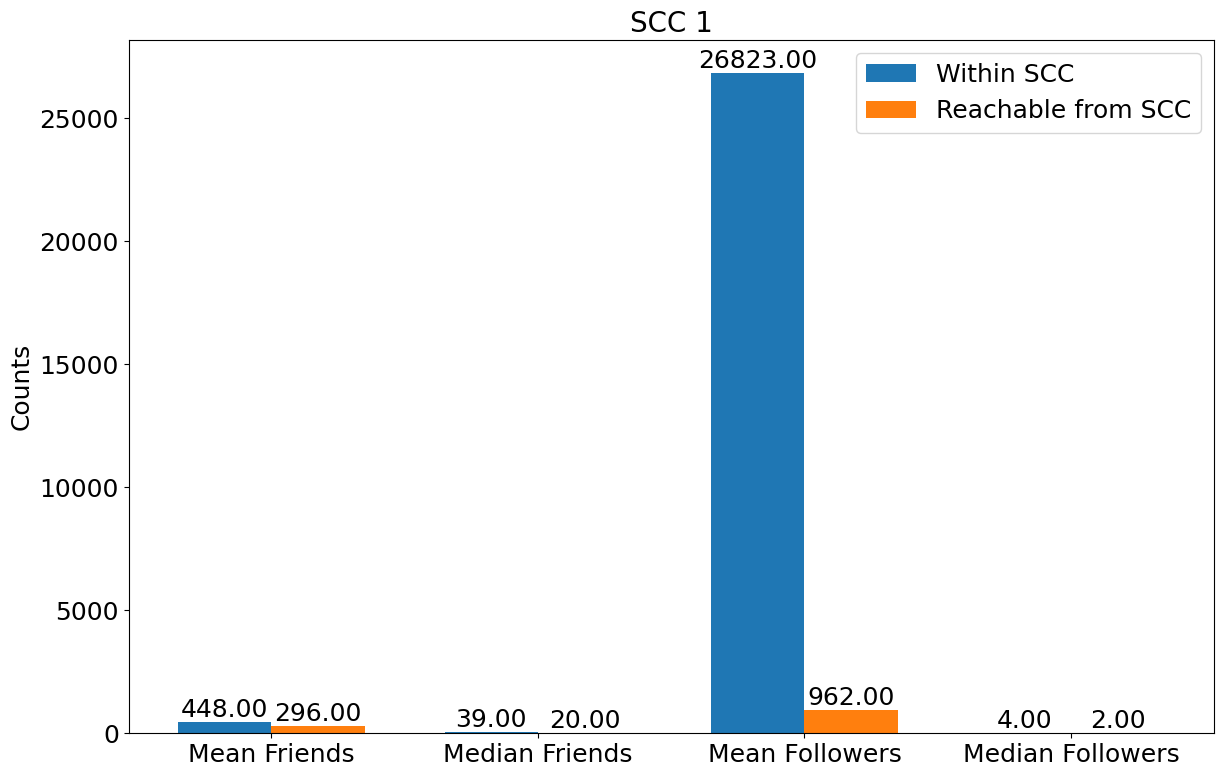

In [88]:
get_friends_followers_stat(all_scc[0], "SCC 1")

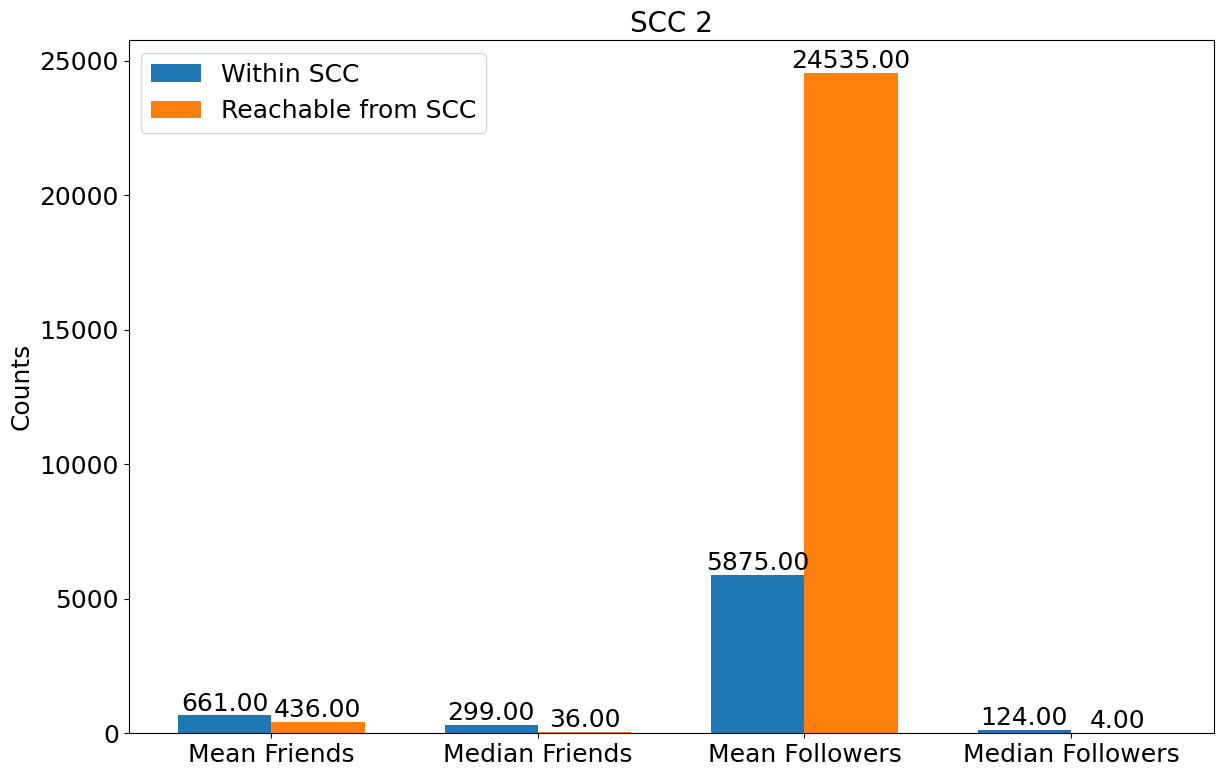

In [69]:
get_friends_followers_stat(all_scc[1], "SCC 2")

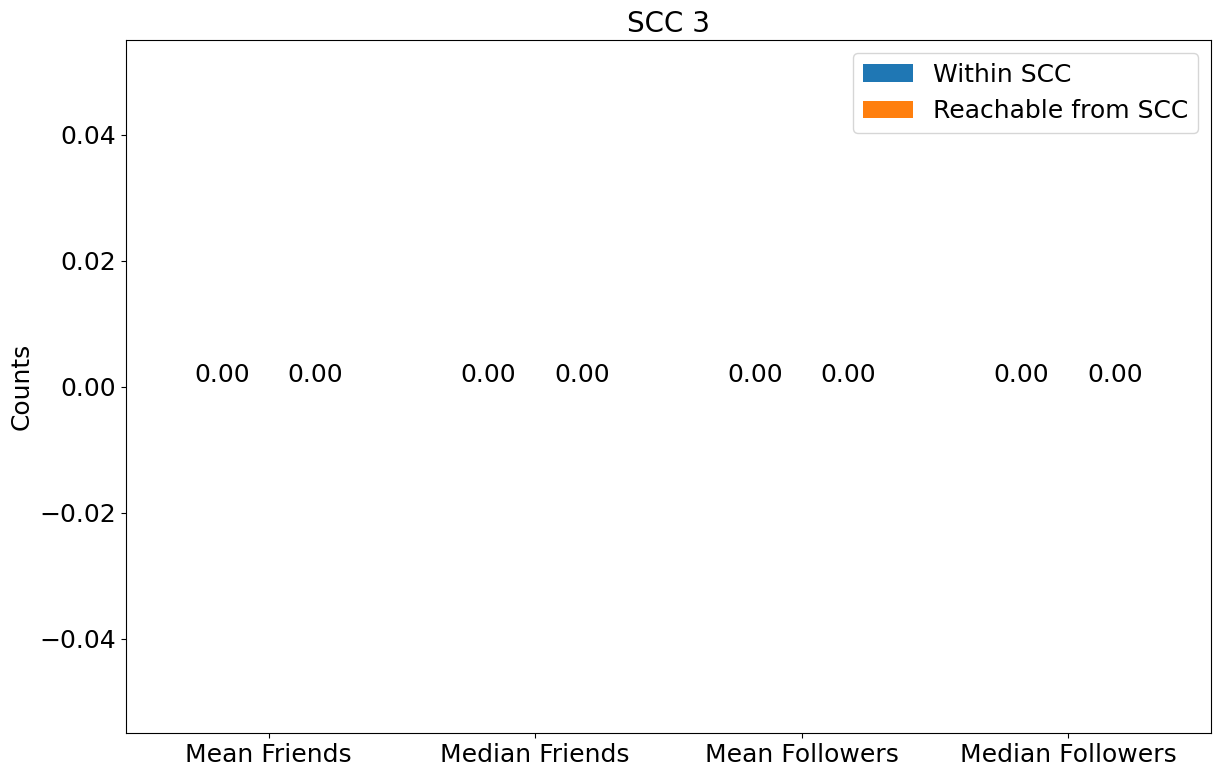

In [89]:
get_friends_followers_stat(all_scc[2], "SCC 3")

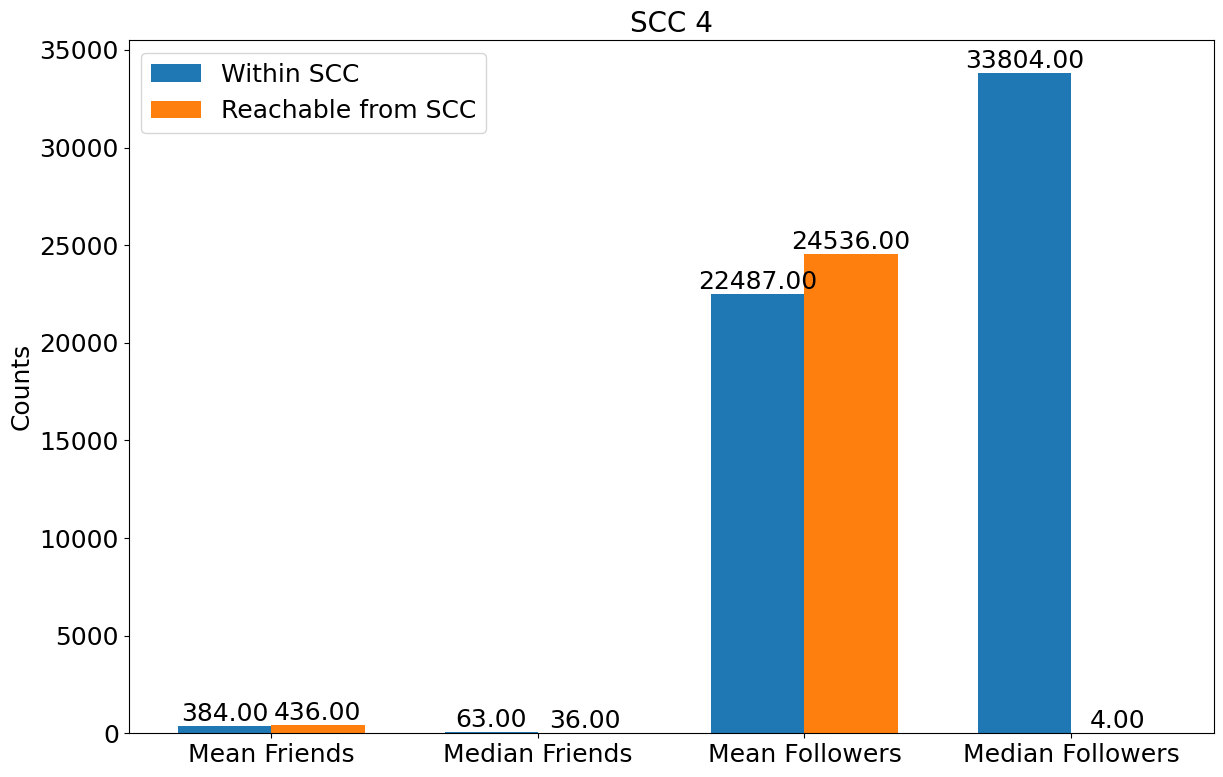

In [90]:
get_friends_followers_stat(all_scc[3], "SCC 4")

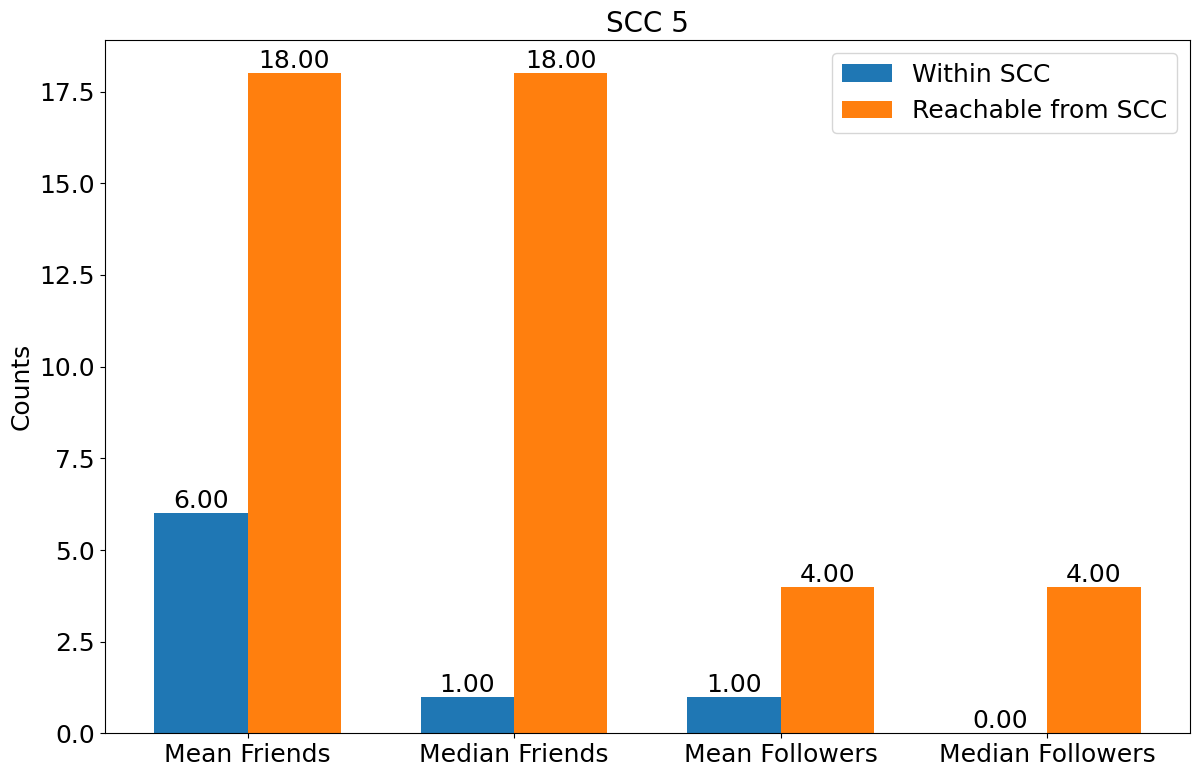

In [91]:
get_friends_followers_stat(all_scc[4], "SCC 5")

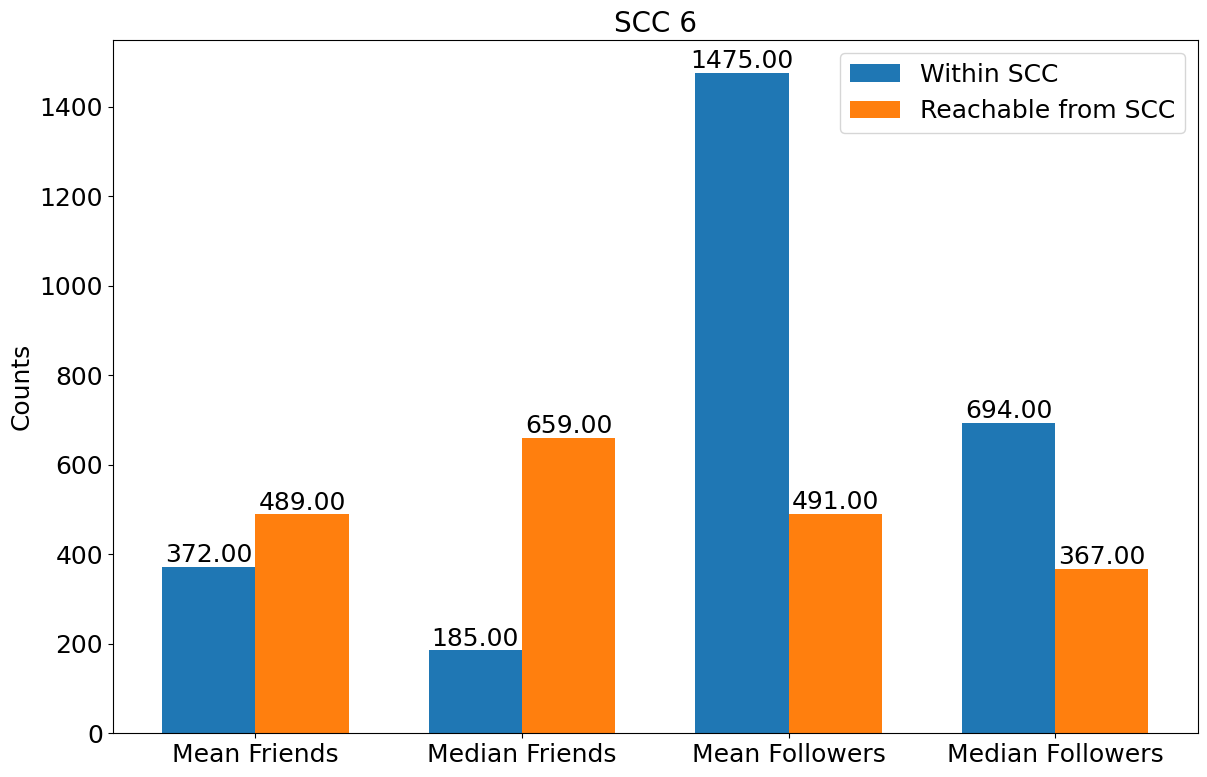

In [92]:
get_friends_followers_stat(all_scc[5], "SCC 6")

In [93]:
def plot_user_activity_evolution(selected_scc, plot_title):

    df_network_scc = df_network[df_network['user.id'].isin(selected_scc) | df_network['in_reply_to_user_id'].isin(selected_scc)]
    df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
    
    relevant_timestamps = df_network_scc[df_network_scc['user.id'].isin(selected_scc)]['created_at'].unique()
    relevant_timestamps = relevant_timestamps[relevant_timestamps >= pd.Timestamp('2022-11-09')]
    
    instances = []
    
    for timestamp in relevant_timestamps:
        instances.append(np.searchsorted(df_network_scc['created_at'], timestamp, side='right'))
        
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    color = 'tab:blue'
    ax1.set_title(plot_title, fontsize=16)
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel('Cumulative Number of Instances')
    ax1.plot(relevant_timestamps, instances, marker='o', markersize=3, linewidth=0.5, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()
        
    plt.savefig("figures/"+plot_title.replace(" ", "_").lower()+"_evolution.pdf", format="pdf", bbox_inches='tight')

    plt.show()

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_33619/106975459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


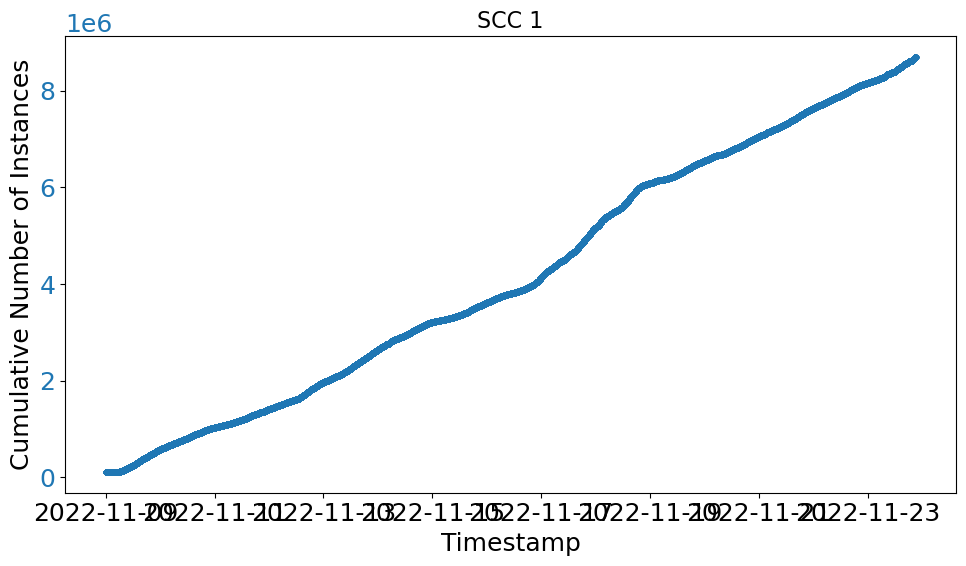

In [94]:
plot_user_activity_evolution(all_scc[0], "SCC 1")

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_33619/106975459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


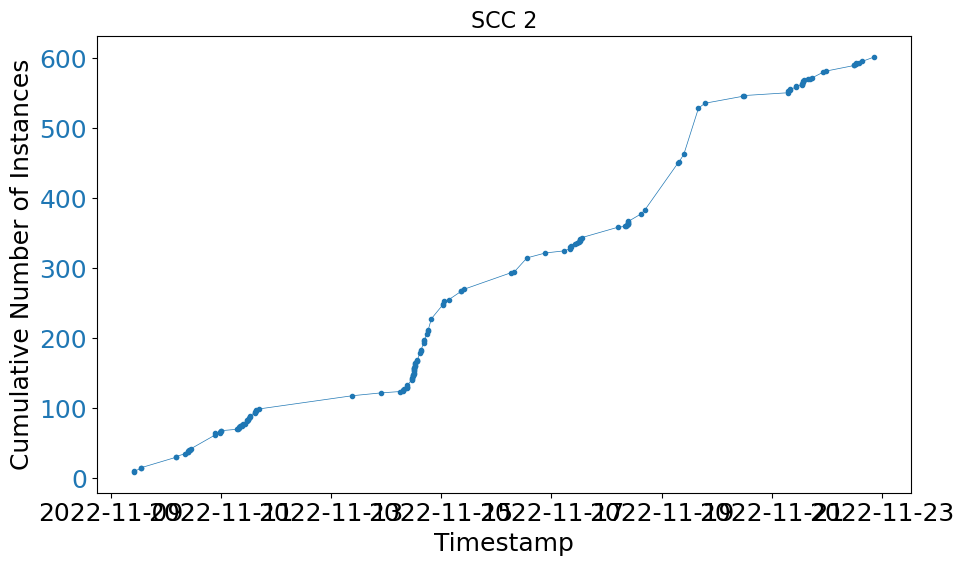

In [95]:
plot_user_activity_evolution(all_scc[1], "SCC 2")

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_33619/106975459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


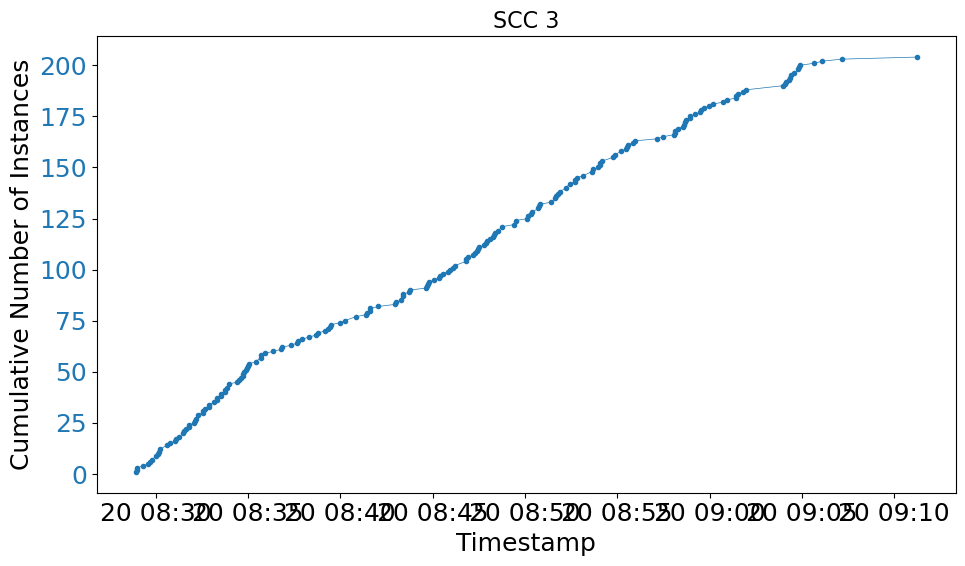

In [96]:
plot_user_activity_evolution(all_scc[2], "SCC 3")

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_33619/106975459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


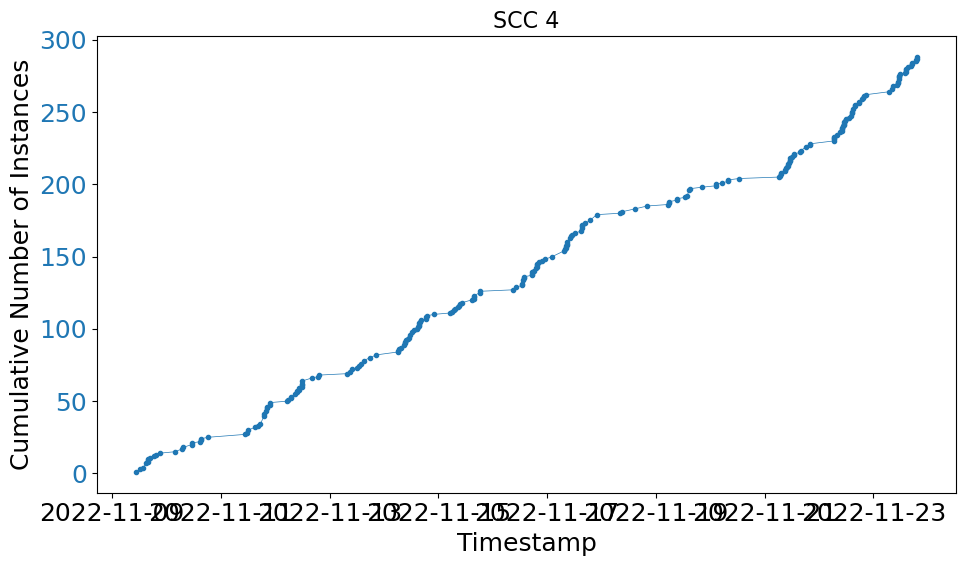

In [97]:
plot_user_activity_evolution(all_scc[3], "SCC 4")

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_33619/106975459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


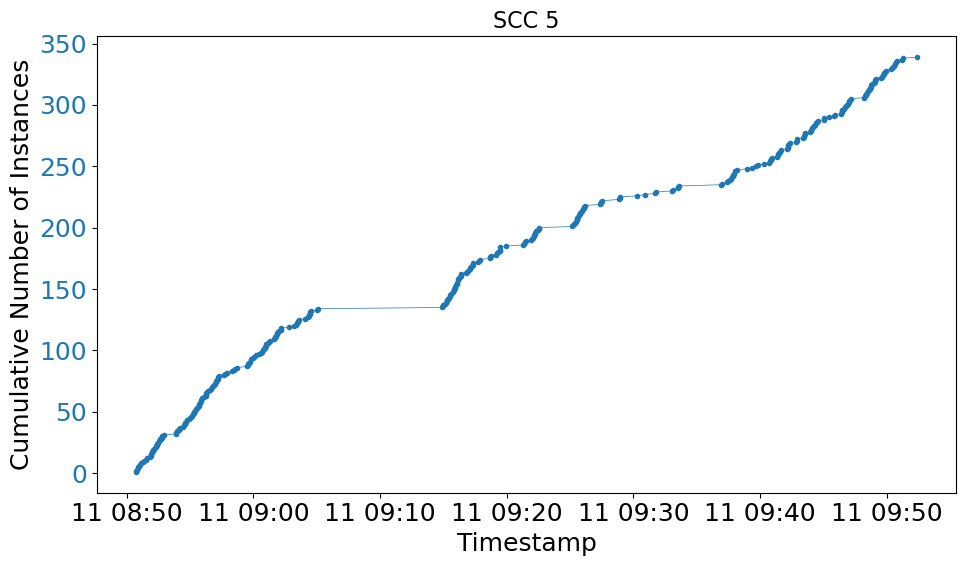

In [98]:
plot_user_activity_evolution(all_scc[4], "SCC 5")

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_33619/106975459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


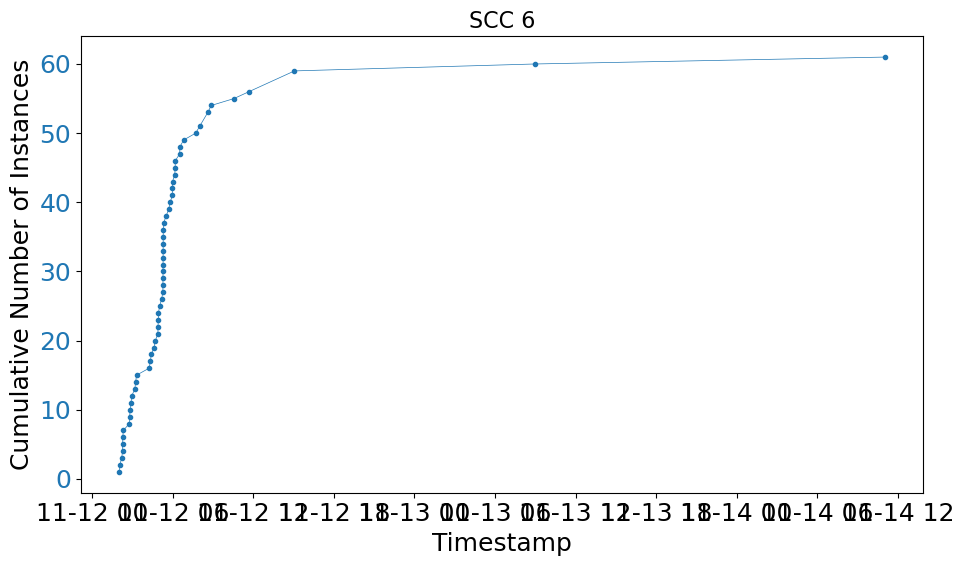

In [99]:
plot_user_activity_evolution(all_scc[5], "SCC 6")

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_33619/3308165925.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_33619/3308165925.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
/var/folders/mr/lkxzqtl162nc8

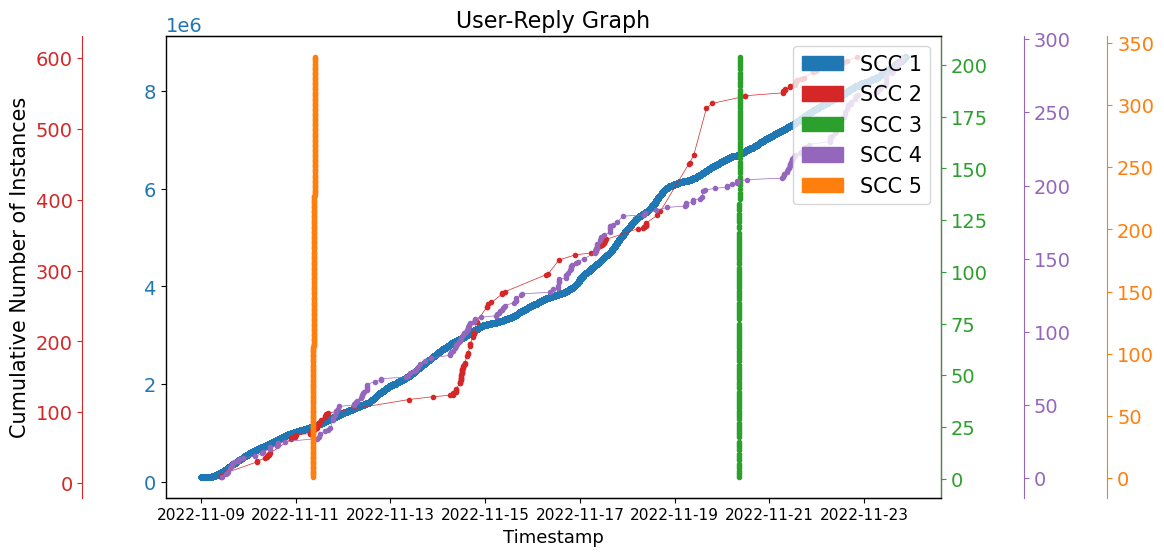

In [107]:
import matplotlib.patches as mpatches

selected_scc = all_scc[0]
df_network_scc = df_network[df_network['user.id'].isin(selected_scc) | df_network['in_reply_to_user_id'].isin(selected_scc)]
df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

relevant_timestamps1 = df_network_scc[df_network_scc['user.id'].isin(selected_scc)]['created_at'].unique()
relevant_timestamps1 = relevant_timestamps1[relevant_timestamps1 >= pd.Timestamp('2022-11-09')]

instances1 = []

for timestamp in relevant_timestamps1:
    instances1.append(np.searchsorted(df_network_scc['created_at'], timestamp, side='right'))
    

selected_scc = all_scc[1]
df_network_scc = df_network[df_network['user.id'].isin(selected_scc) | df_network['in_reply_to_user_id'].isin(selected_scc)]
df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

relevant_timestamps2 = df_network_scc[df_network_scc['user.id'].isin(selected_scc)]['created_at'].unique()
relevant_timestamps2 = relevant_timestamps2[relevant_timestamps2 >= pd.Timestamp('2022-11-09')]

instances2 = []

for timestamp in relevant_timestamps2:
    instances2.append(np.searchsorted(df_network_scc['created_at'], timestamp, side='right'))


selected_scc = all_scc[2]
df_network_scc = df_network[df_network['user.id'].isin(selected_scc) | df_network['in_reply_to_user_id'].isin(selected_scc)]
df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

relevant_timestamps3 = df_network_scc[df_network_scc['user.id'].isin(selected_scc)]['created_at'].unique()
relevant_timestamps3 = relevant_timestamps3[relevant_timestamps3 >= pd.Timestamp('2022-11-09')]

instances3 = []

for timestamp in relevant_timestamps3:
    instances3.append(np.searchsorted(df_network_scc['created_at'], timestamp, side='right'))


selected_scc = all_scc[3]
df_network_scc = df_network[df_network['user.id'].isin(selected_scc) | df_network['in_reply_to_user_id'].isin(selected_scc)]
df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

relevant_timestamps4 = df_network_scc[df_network_scc['user.id'].isin(selected_scc)]['created_at'].unique()
relevant_timestamps4 = relevant_timestamps4[relevant_timestamps4 >= pd.Timestamp('2022-11-09')]

instances4 = []

for timestamp in relevant_timestamps4:
    instances4.append(np.searchsorted(df_network_scc['created_at'], timestamp, side='right'))



selected_scc = all_scc[4]
df_network_scc = df_network[df_network['user.id'].isin(selected_scc) | df_network['in_reply_to_user_id'].isin(selected_scc)]
df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

relevant_timestamps5 = df_network_scc[df_network_scc['user.id'].isin(selected_scc)]['created_at'].unique()
relevant_timestamps5 = relevant_timestamps5[relevant_timestamps5 >= pd.Timestamp('2022-11-09')]

instances5 = []

for timestamp in relevant_timestamps5:
    instances5.append(np.searchsorted(df_network_scc['created_at'], timestamp, side='right'))




selected_scc = all_scc[5]
df_network_scc = df_network[df_network['user.id'].isin(selected_scc) | df_network['in_reply_to_user_id'].isin(selected_scc)]
df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

relevant_timestamps6 = df_network_scc[df_network_scc['user.id'].isin(selected_scc)]['created_at'].unique()
relevant_timestamps6 = relevant_timestamps6[relevant_timestamps6 >= pd.Timestamp('2022-11-09')]

instances6 = []

for timestamp in relevant_timestamps6:
    instances6.append(np.searchsorted(df_network_scc['created_at'], timestamp, side='right'))




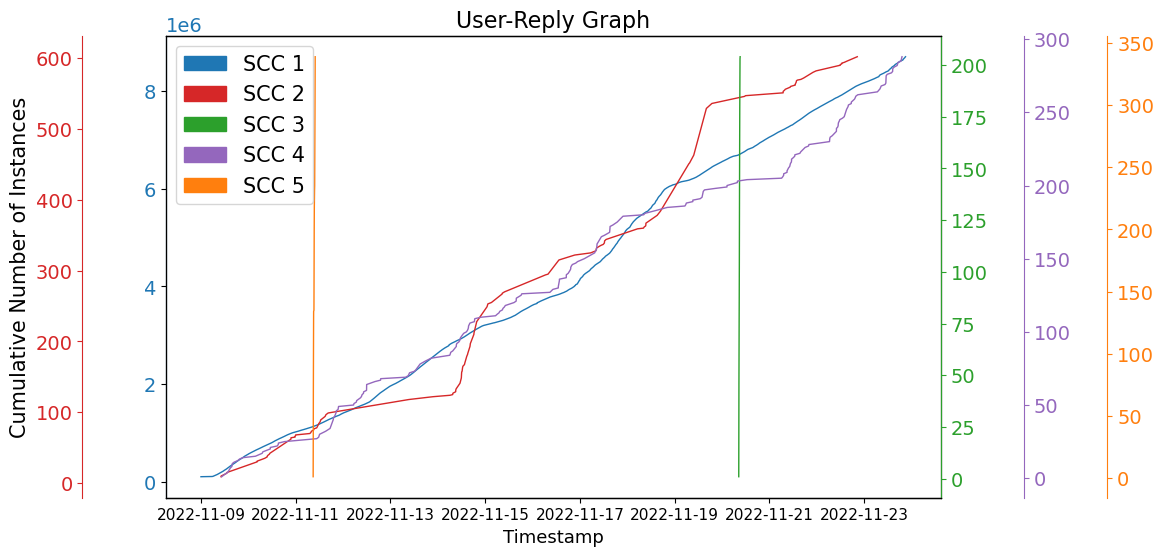

In [126]:


fig, ax1 = plt.subplots(figsize=(10, 6))

plt.rc('font', size=15)
# plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=14)

color1 = 'tab:blue'
color2 = 'tab:red'
color3 = 'tab:green'
color4 = 'tab:purple'
color5 = 'tab:orange'
color6 = 'tab:pink'


ax1.set_title("User-Reply Graph", fontsize=16)
ax1.set_xlabel('Timestamp', fontsize=13)
ax1.spines['left'].set_position(('outward', 0))
ax1.spines['left'].set_color(color1)
ax1.plot(relevant_timestamps1, instances1, linewidth=1, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)


ax2 = ax1.twinx()
ax2.spines['left'].set_position(('outward', 60))
ax2.spines['left'].set_color(color2)
ax2.set_ylabel('Cumulative Number of Instances', color = 'black')
ax2.yaxis.tick_left()
ax2.yaxis.set_label_position('left')
ax2.tick_params(axis='y', colors=color2)
ax2.plot(relevant_timestamps2, instances2, linewidth=1, color=color2)

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 0))
ax3.spines['right'].set_color(color3)
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.tick_params(axis='y', colors=color3)
ax3.plot(relevant_timestamps3, instances3, linewidth=1, color=color3)

ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 60))
ax4.spines['right'].set_color(color4)
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position('right')
ax4.tick_params(axis='y', colors=color4)
ax4.plot(relevant_timestamps4, instances4, linewidth=1, color=color4)

ax5 = ax1.twinx()
ax5.spines['right'].set_position(('outward', 120))
ax5.spines['right'].set_color(color5)
ax5.yaxis.tick_right()
ax5.yaxis.set_label_position('right')
ax5.tick_params(axis='y', colors=color5)
ax5.plot(relevant_timestamps5, instances5, linewidth=1, color=color5)


# ax6 = ax1.twinx()
# ax6.spines['right'].set_position(('outward', 120))
# ax6.spines['right'].set_color(color6)
# ax6.yaxis.tick_right()
# ax6.yaxis.set_label_position('left')
# ax6.tick_params(axis='y', colors=color6)
# ax6.plot(relevant_timestamps6, instances6, marker='o', markersize=3, linewidth=0.5, color=color6)


patch1 = mpatches.Patch(color=color1, label='SCC 1')
patch2 = mpatches.Patch(color=color2, label='SCC 2')
patch3 = mpatches.Patch(color=color3, label='SCC 3')
patch4 = mpatches.Patch(color=color4, label='SCC 4')
patch5 = mpatches.Patch(color=color5, label='SCC 5')
# patch6 = mpatches.Patch(color=color6, label='SCC 6')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], loc='upper left')

plt.savefig("figures/user_reply_scc_evolution.pdf", format="pdf", bbox_inches='tight', dpi=500)

plt.show()
    